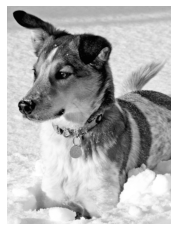

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Exercise 1.1
Load the image `dog.jpg` and compute the full SVD. Choose a rank $r < m$ and confirmed that the matrix $U^{T}U$ is the $r \times r$ idendity matrix. Now confirm that $UU^{T}$ is not the identity matrix. Compute the norm of the error between $UU^{T}$ and the $n \times n$ identity matrix as the rank $r$ varies from 1 to $n$ and plot the error.

In [86]:
# Computing full SVD
U, S, VT = np.linalg.svd(X, full_matrices = True)
S = np.diag(S)
UT = np.transpose(U)

In [110]:
rank = 10

UTU = UT[:rank,:] @ U[:, :rank]
UUT = U[:, :rank] @ UT[:rank, :]

UTU = np.diag(UTU)
UUT = np.diag(UUT)

# Here we print the diagonal of UTU and UUT. As you can see we confirmed the two things we asked for.
print(UTU, UUT)




[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0.0012135  0.00117946 0.00117383 ... 0.00232848 0.0023703  0.00239231]


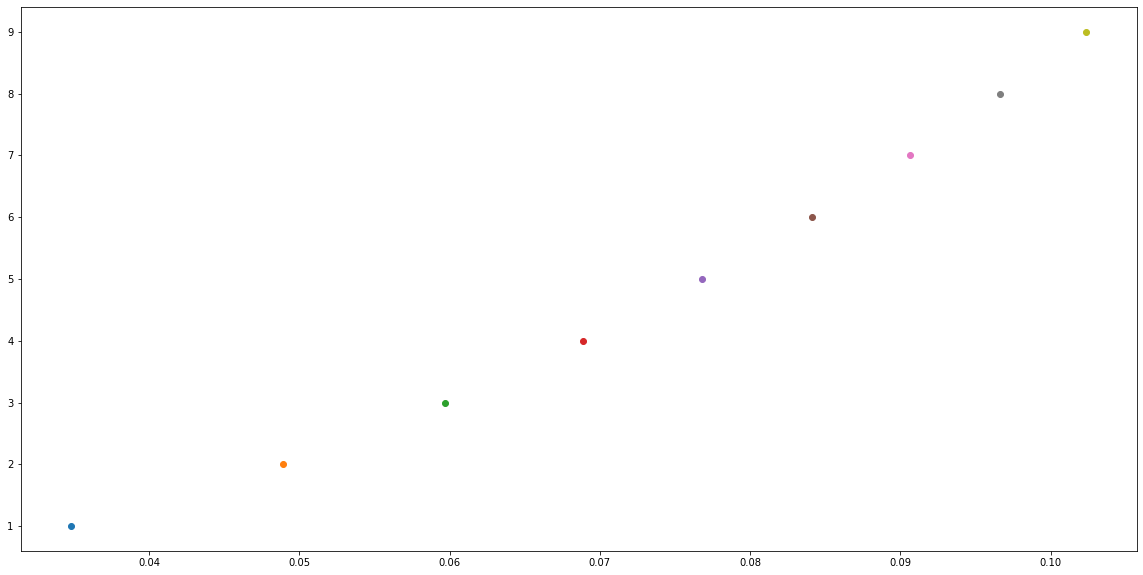

In [141]:
plt.rcParams['figure.figsize'] = [20, 10]

# This is the plot for the error values
for n in (range(1, rank)):
    values = []
    norm = np.linalg.norm(UUT[:n])
    values.append(norm)
    plt.plot(values, n, 'o')

# Exercise 1.2 
Load the image `dog.png` and compute the economy SVD. Compute the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $r$. Square this error to compute the fraction of missing variance as a function of $r$. Square this error to compute the fraction of missing variance as a function of $r$. You may also decide to plot 1 minus the error of missing variance to visualize the amount of norm or variance captured at a given rank $r$. Plot these quantities along with the comulative sum of singular values as a function $r$. Find the rank $r$ where the reconstruction captures $99\%$ of the total variance. Compare this with the rank $r$ where the reconstruction captures $99\%$ in the Frobenius norm with the rank $r$ that captures $99\%$ of the cumulative sum of singular values.